# LDATA 2010 - Information Visualisation

# Project  : Glioblastoma Gene Interaction

#### Group B : Ndamtang Manuelle, Thoen Florian

## Imports et installs

In [35]:
import matplotlib.cm as cm
import networkx as nx
import community as community_louvain
import pandas as pd
import matplotlib.pyplot as plt

## Loading DataFrame

In [10]:
# reading the CSV file
dataframe= pd.read_table('BIOGRID-PROJECT-glioblastoma_project-GENES.projectindex.csv')

# displaying the contents of the CSV file
print(dataframe)

# reading the CSV file
dataframe2= pd.read_table('BIOGRID-PROJECT-glioblastoma_project-INTERACTIONS.tab3.csv')

# displaying the contents of the CSV file
print(dataframe2)



     #BIOGRID ID  ENTREZ GENE ID       SYSTEMATIC NAME OFFICIAL SYMBOL  \
0         108621            2335                     -             FN1   
1         108997            2735                     -            GLI1   
2         109355            3110                     -            MNX1   
3         111308            5290                     -          PIK3CA   
4         111632            5651                     -        TMPRSS15   
..           ...             ...                   ...             ...   
193       123785           83872           GS1-174L6.1           HMCN1   
194       128548          219493                     -          OR5AR1   
195       128542          219473                     -           OR8K3   
196       125712          121227  UNQ287/PRO326/PRO335           LRIG3   
197       126514          138474                     -           TAF1L   

                                      SYNONYMS  ORGANISM ID ORGANISM NAME  \
0     CIG|ED-B|FINC|FN|FNZ|GFND|GF

C:\Users\thoen\mambaforge\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


       #BioGRID Interaction ID Entrez Gene Interactor A  \
0                         2424                      672   
1                         3189                     5925   
2                         4867                     1634   
3                         5438                     3791   
4                         5977                     2260   
...                        ...                      ...   
36495                  3196690                     6262   
36496                  3196691                     6262   
36497                  3196692                     6262   
36498                  3196693                     6262   
36499                  3196698                     7052   

       Entrez Gene Interactor B  BioGRID ID Interactor A  \
0                          2956                   107140   
1                          1523                   111860   
2                          1956                   108002   
3                           308                   1

## Function To Build Graph

In [32]:
def createGraph(dataframe, dataframe2):
    lenDataFrame=len(dataframe.index)
    G = nx.Graph()
    count = 0
    while count < lenDataFrame:
        first = dataframe.iat[count,3]
        G.add_node(first)
        count += 1
    label = {}
    for i in G.nodes():
        label[i] = i
    count2 = 0
    tab=G.nodes()
    lenDataFrame2=len(dataframe2.index)
    while count2 < lenDataFrame2:
        first = dataframe2.iat[count2,7]
        second = dataframe2.iat[count2,8]
        if first in tab and second in tab:
            G.add_edge(first,second)
        count2 += 1
    return G

## Visualisation of the Graph

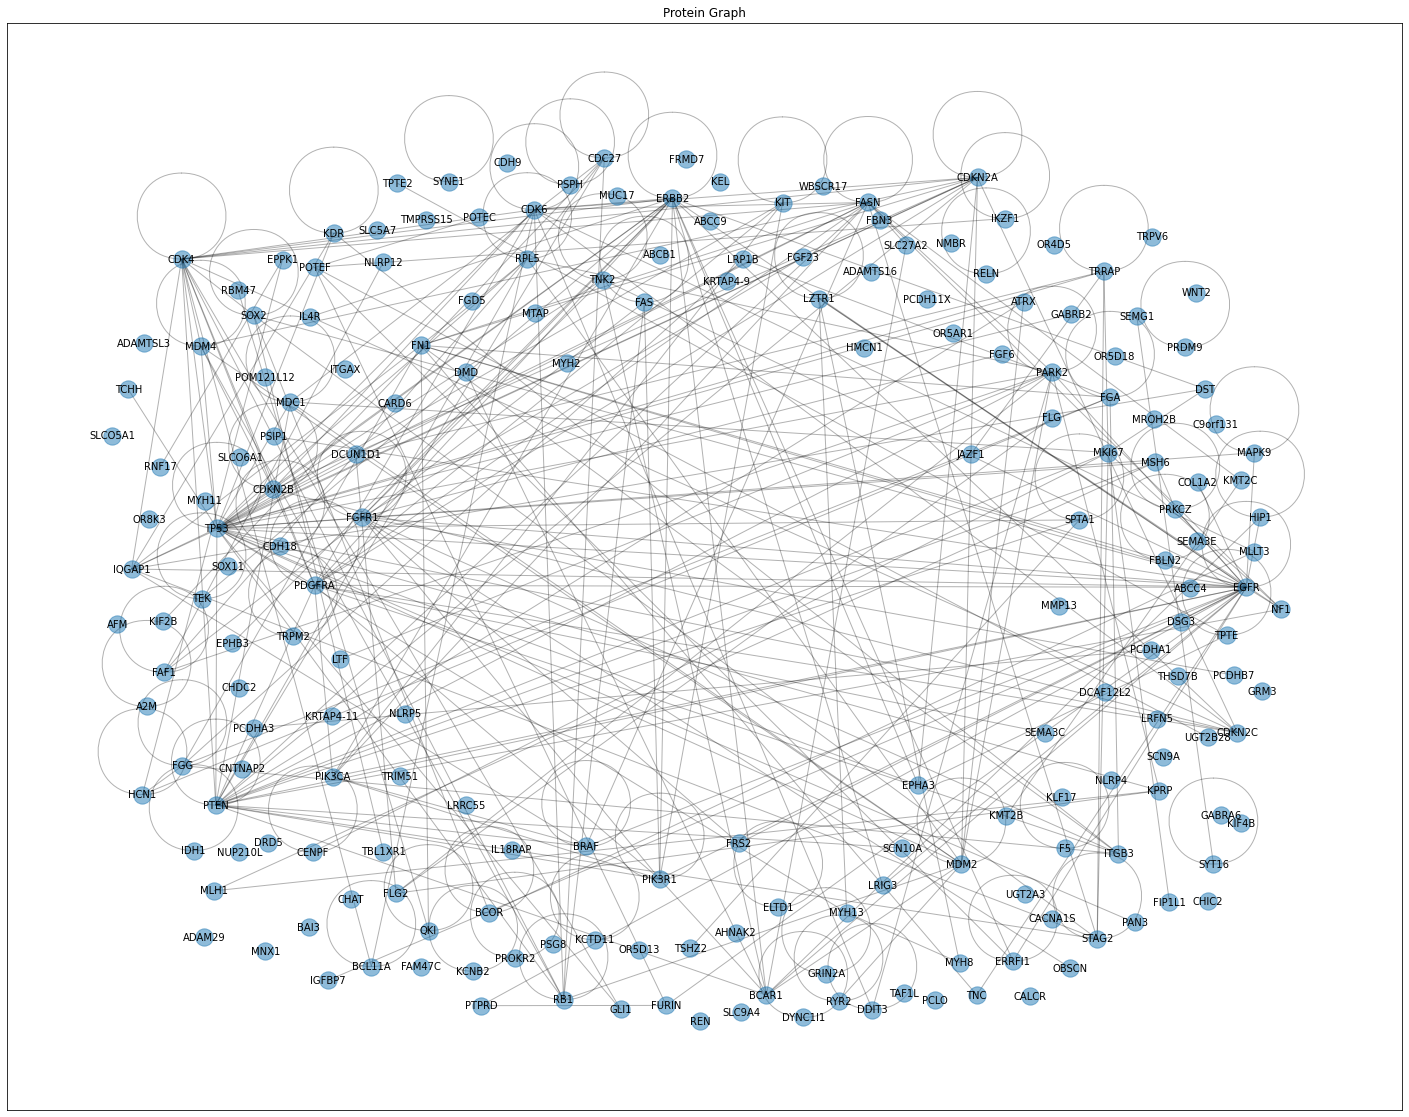

In [56]:
G = createGraph(dataframe,dataframe2)
plt.figure(figsize=(25,20))
plt.title('Protein Graph')
pos1 = nx.spring_layout(G,k=3,iterations= 10)
nx.draw_networkx_nodes(G,pos1,alpha=0.5)
nx.draw_networkx_edges(G,pos1, alpha=0.3)
nx.draw_networkx_labels(G,pos1,label,font_size=10)
plt.show()

In [54]:
#############TEST
#string = dataframe.iat[0,4]
#tableau=string.split('|')
#print(tableau)
#tab=['jdjd']
#print(tab+tableau)

['CIG', 'ED-B', 'FINC', 'FN', 'FNZ', 'GFND', 'GFND2', 'LETS', 'MSF']
['jdjd', 'CIG', 'ED-B', 'FINC', 'FN', 'FNZ', 'GFND', 'GFND2', 'LETS', 'MSF']


## Functions about the differents metrics of the Graph

In [49]:
def countProtein():
    G=createGraph(dataframe,dataframe2)
    return G.number_of_nodes()
def countInteractions():
    G=createGraph(dataframe,dataframe2)
    return G.number_of_edges()
def betweeness_centrality():
    G=createGraph(dataframe,dataframe2)
    return nx.betweenness_centrality(G)
def clustering_coefficient():
    G=createGraph(dataframe,dataframe2)
    return nx.clustering(G)
def MST():
    G=createGraph(dataframe,dataframe2)
    return nx.minimum_spanning_tree(G)
def shortestPath(G,source,target):
    return nx.shortest_path(G,source,target)
def communitiesDetection(G):
    partition = community_louvain.best_partition(G)
    # draw the graph
    plt.figure(figsize=(25,20))
    plt.title('Communities_Detection')
    pos = nx.spring_layout(G,k=3, iterations=10)
    # color the nodes according to their partition
    cmap = cm.get_cmap('plasma', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=90,cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3,label=True)
    nx.draw_networkx_labels(G,pos,label,font_size=10)
    plt.show()
#def numberOfCommunities(G)
    

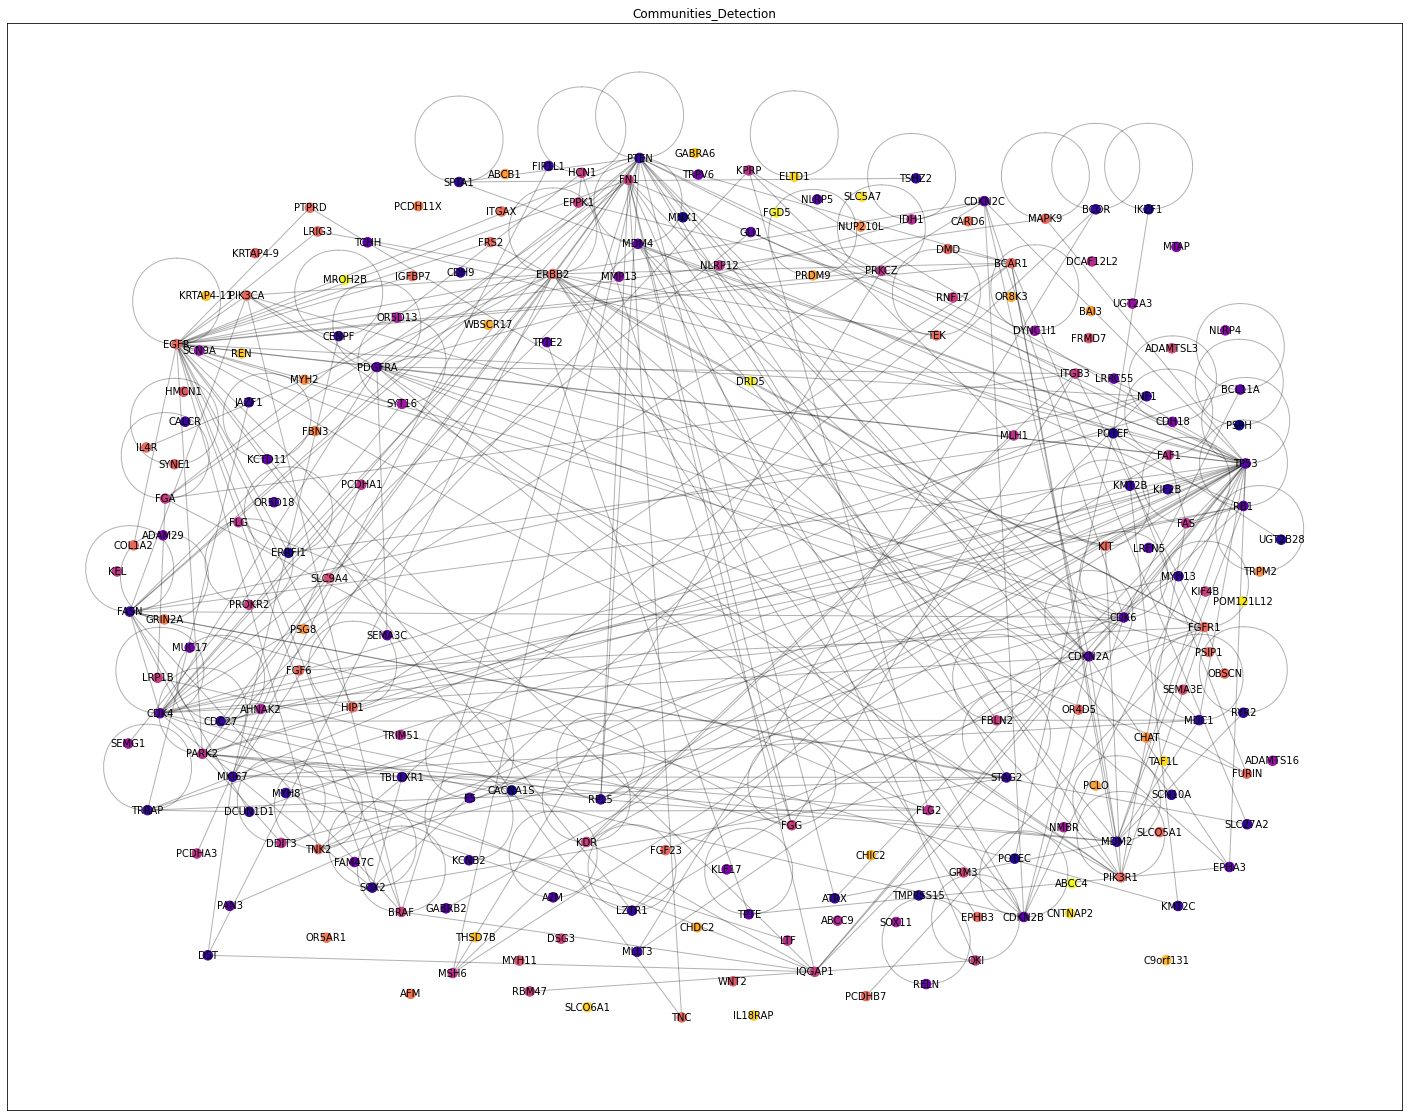

In [52]:
######## TEST COMMU DETECTION
communitiesDetection(G)

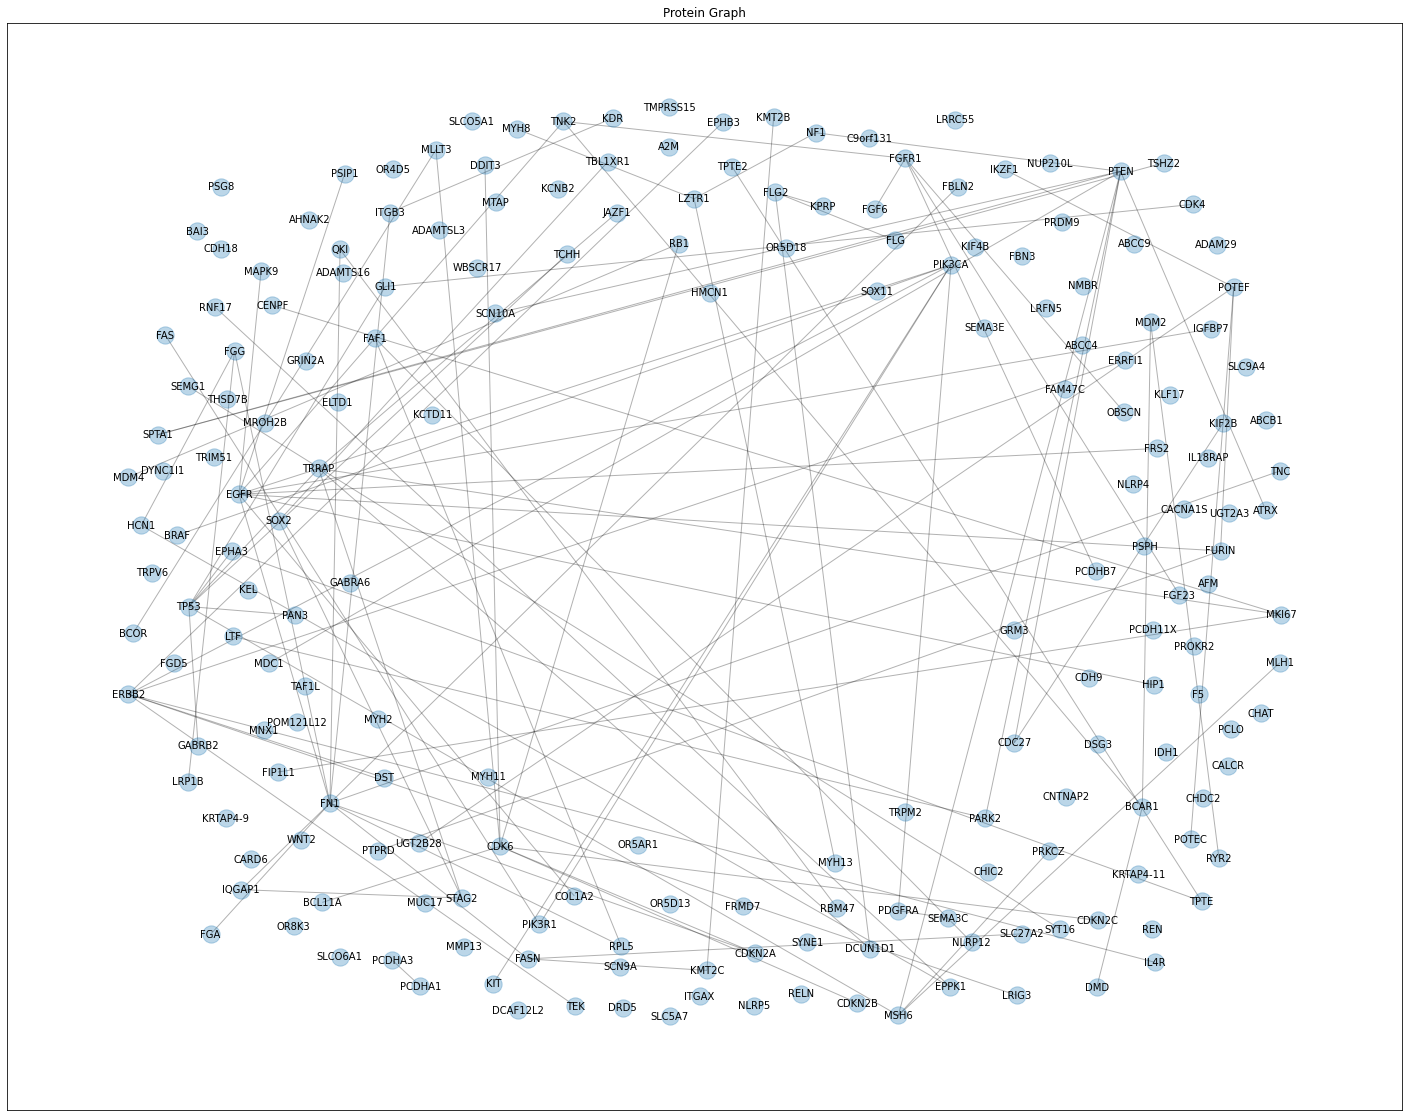

In [57]:
########TEST AFFICHAGE MINIMUM SPANNING TREE
G=MST()
plt.figure(figsize=(25,20))
plt.title('Protein Graph')
pos1 = nx.spring_layout(G,k=3,iterations= 10)
nx.draw_networkx_nodes(G,pos1,alpha=0.3)
nx.draw_networkx_edges(G,pos1, alpha=0.3)
nx.draw_networkx_labels(G,pos1,label,font_size=10)
plt.show()

In [58]:
G=createGraph(dataframe,dataframe2)
x=nx.adjacency_matrix(G)
print(x)

  (0, 33)	1
  (0, 59)	1
  (0, 75)	1
  (0, 85)	1
  (0, 93)	1
  (0, 106)	1
  (0, 120)	1
  (0, 141)	1
  (0, 149)	1
  (0, 151)	1
  (0, 159)	1
  (1, 140)	1
  (1, 188)	1
  (3, 27)	1
  (3, 29)	1
  (3, 33)	1
  (3, 77)	1
  (3, 85)	1
  (3, 134)	1
  (3, 166)	1
  (6, 110)	1
  (7, 7)	1
  (7, 12)	1
  (7, 21)	1
  (7, 95)	1
  :	:
  (188, 30)	1
  (188, 33)	1
  (188, 77)	1
  (188, 101)	1
  (188, 106)	1
  (188, 119)	1
  (188, 131)	1
  (188, 134)	1
  (188, 140)	1
  (188, 149)	1
  (188, 153)	1
  (188, 154)	1
  (188, 176)	1
  (188, 188)	1
  (189, 25)	1
  (189, 32)	1
  (189, 33)	1
  (189, 85)	1
  (189, 95)	1
  (190, 85)	1
  (191, 40)	1
  (191, 137)	1
  (191, 191)	1
  (196, 77)	1
  (196, 85)	1
